In [1]:
import numpy as np
import os
import datetime
import time
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sn

%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('mode.chained_assignment', None)
sn.set(font_scale=1.5)


fig_size=(15,8)
sn.set(rc={'figure.figsize':fig_size})

In [2]:
files = os.listdir('./results/')
model_stats = None
for file in files:
    df = pd.read_csv("./results/"+file)
    if model_stats is not None:
        model_stats = pd.concat([model_stats, df], axis=0)
    else:
        model_stats = df
        
model_stats = model_stats.drop('Unnamed: 0', 1)
model_stats


,loss_plot,test_loss_plot,name,bleu1,bleu2,bleu3,bleu4
0,1.319566,1.118552,batch_64_lr_0.001_embedding_dim_128_lr_decay_f...,0.358266,0.226587,0.359116,0.402935
1,1.030292,1.042027,batch_64_lr_0.001_embedding_dim_128_lr_decay_f...,0.358266,0.226587,0.359116,0.402935
2,0.939160,1.022026,batch_64_lr_0.001_embedding_dim_128_lr_decay_f...,0.358266,0.226587,0.359116,0.402935
3,0.877596,1.013029,batch_64_lr_0.001_embedding_dim_128_lr_decay_f...,0.358266,0.226587,0.359116,0.402935
4,0.828693,1.017646,batch_64_lr_0.001_embedding_dim_128_lr_decay_f...,0.358266,0.226587,0.359116,0.402935
...,...,...,...,...,...,...,...
10,0.603075,1.130156,batch_64_lr_0.001_embedding_dim_200_lr_decay_f...,0.367879,0.300372,0.325745,0.332417
11,0.576854,1.152429,batch_64_lr_0.001_embedding_dim_200_lr_decay_f...,0.367879,0.300372,0.325745,0.332417
12,0.552289,1.183508,batch_64_lr_0.001_embedding_dim_200_lr_decay_f...,0.367879,0.300372,0.325745,0.332417
13,0.529565,1.202229,batch_64_lr_0.001_embedding_dim_200_lr_decay_f...,0.367879,0.300372,0.325745,0.332417


In [18]:
def plot_loss(column, plot_name, fig_name):
    loss_data = {}
    plt.rcParams['figure.figsize'] = fig_size

    for file in files:
       loss_data[file.replace('.csv','')]= model_stats[model_stats['name']==file.replace('.csv','')][column].values.tolist()

    for key, data in loss_data.items():
        plt.plot(data)

    leg = plt.legend(loss_data.keys(), loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(plot_name)
    for line in leg.get_lines():
        line.set_linewidth(10)
    plt.savefig('images/'+fig_name+".svg", format='svg', dpi=1200)
    plt.show()


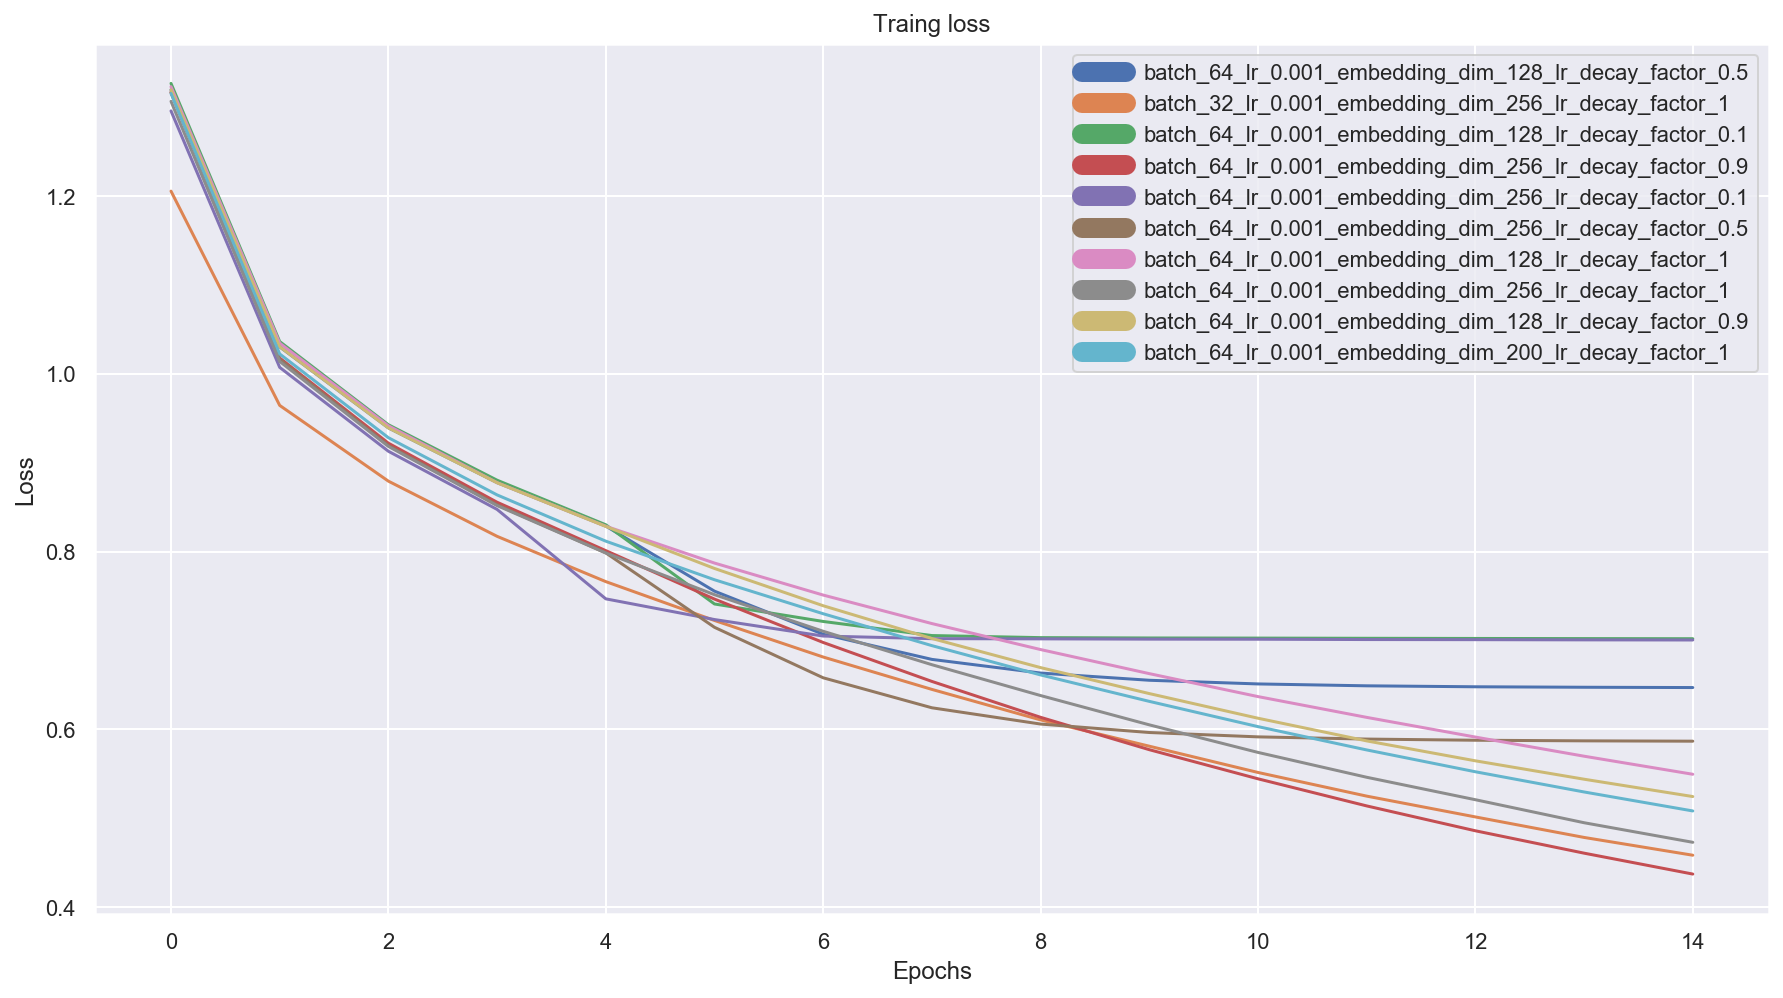

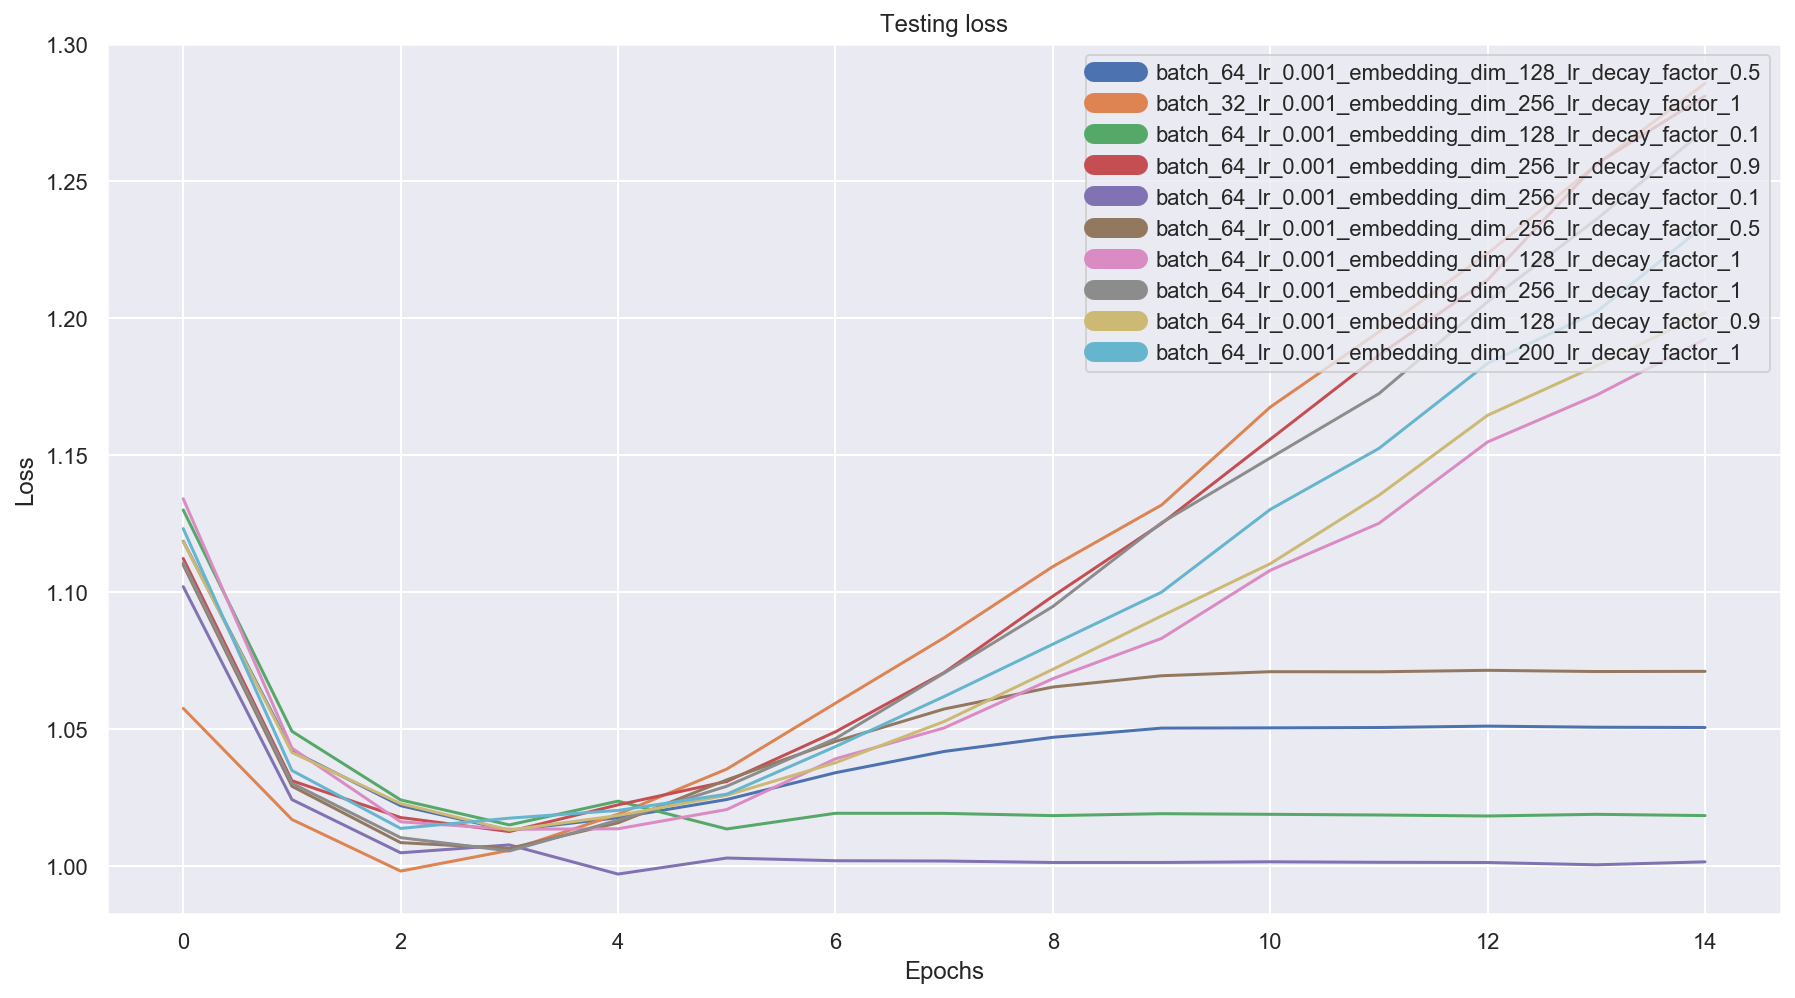

In [19]:
plot_loss('loss_plot','Traing loss','training_loss')
plot_loss('test_loss_plot','Testing loss', 'test_loss')

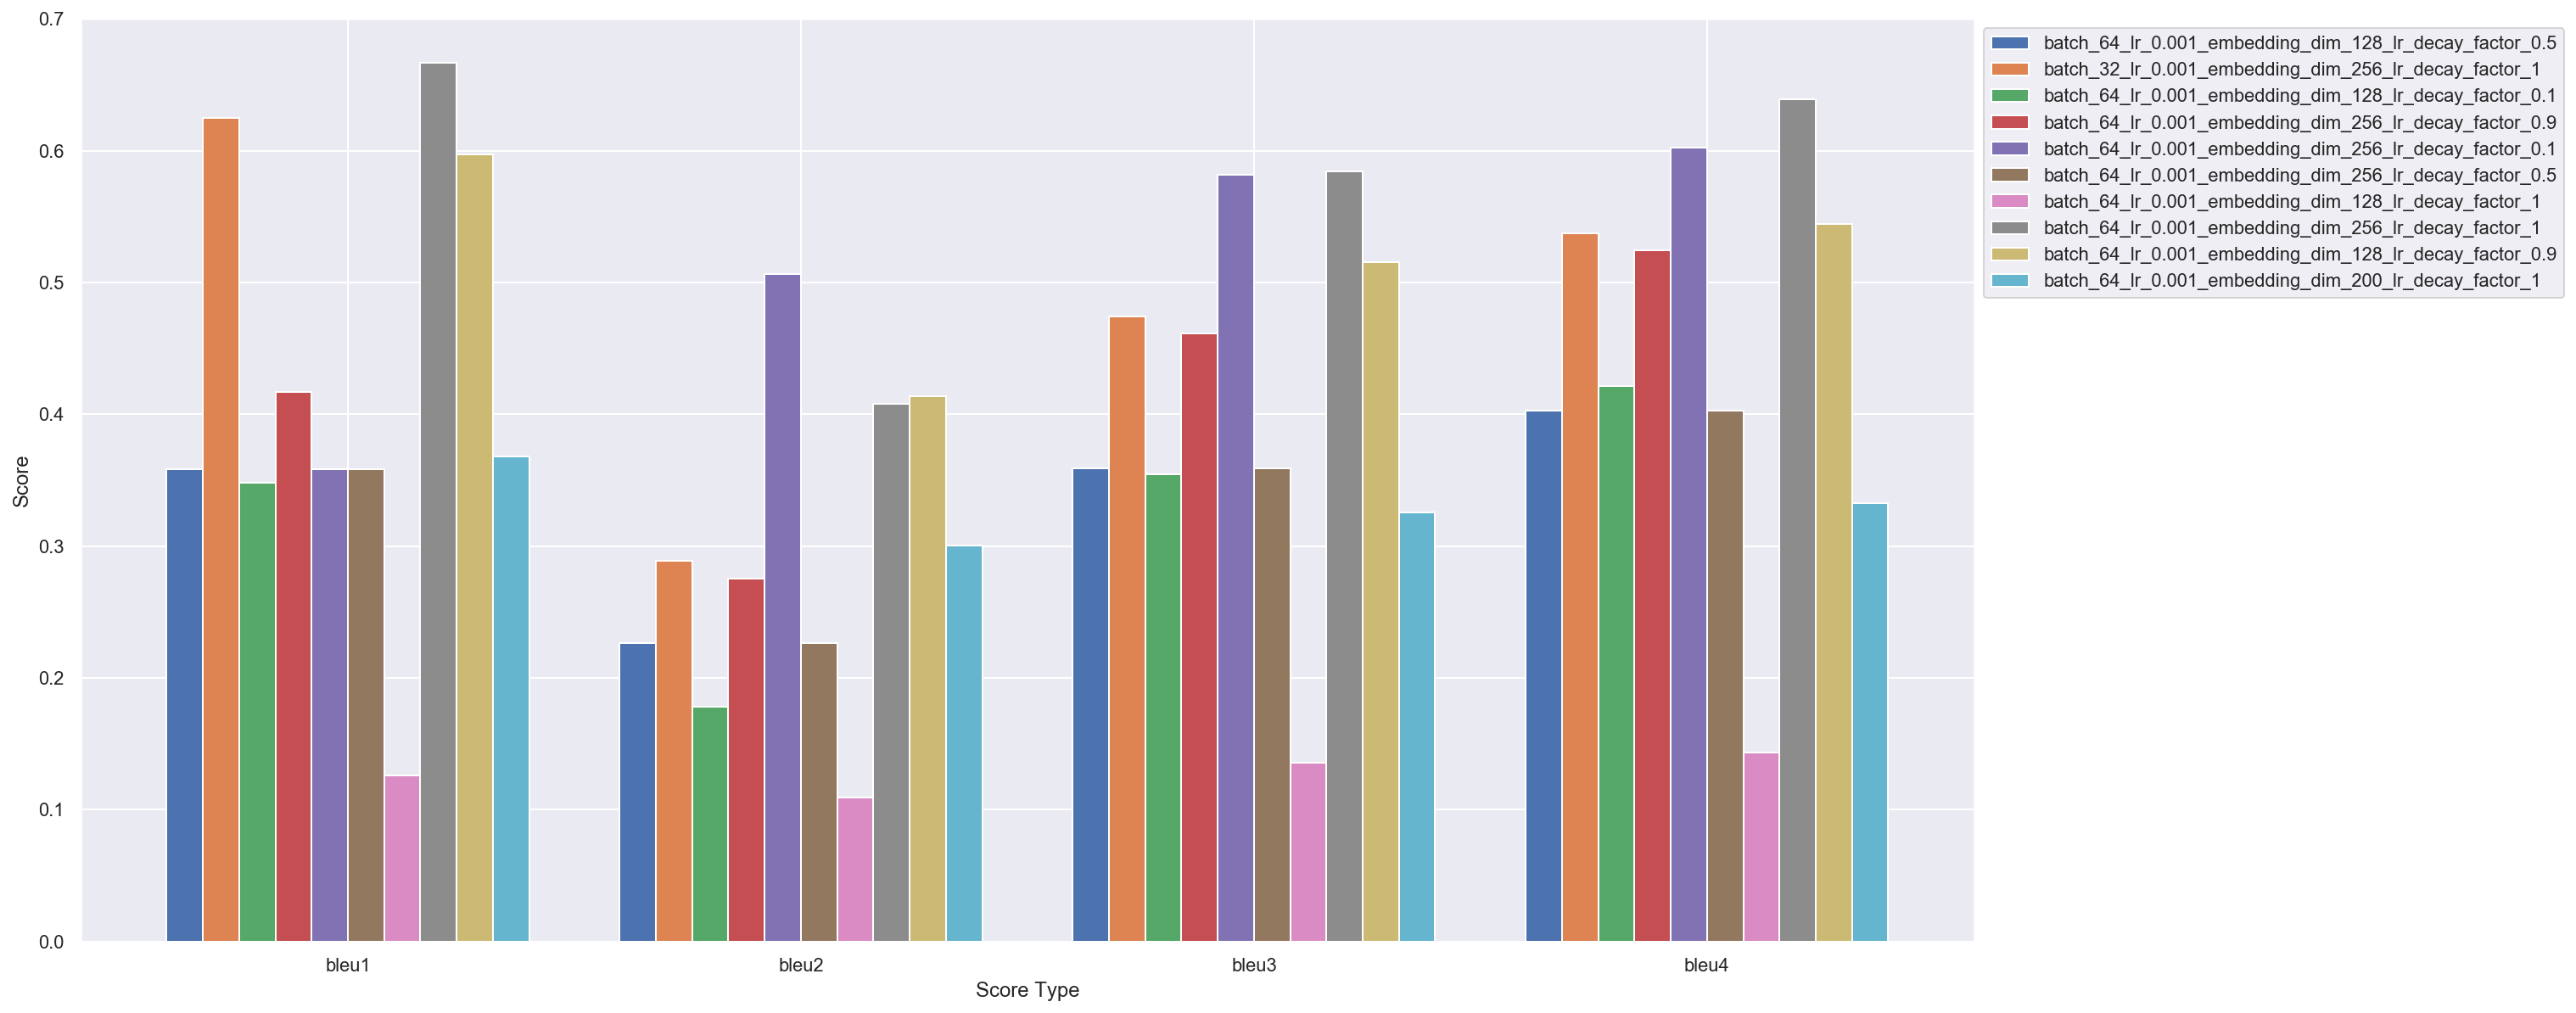

In [20]:
plt.rcParams['figure.figsize'] = (20,10)

bleu_scores={}
for file in files:
   bleu_scores[file.replace('.csv','')]= model_stats[model_stats['name']==file.replace('.csv','')][['bleu1','bleu2','bleu3','bleu4']].values.tolist()[0]
width =0.08
index=0
ind = np.arange(4)
for key, data in bleu_scores.items():
    plt.bar(ind+(index*width), data, width=width,align='edge')
    index+=1
leg = plt.legend(bleu_scores.keys(), loc='upper left',bbox_to_anchor=(1.0, 1))
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.xticks(ind + (len(bleu_scores)*width) / 2, ['bleu1','bleu2','bleu3','bleu4'])
plt.savefig('images/'+ 'bleu_scores.svg',format='svg', dpi=1200)
plt.show()

![Bleu score](https://raw.githubusercontent.com/ashwanikumar04/cnn-rnn-image-caption/main/images/bleu_scores.svg)